# Introdução ao Aprendizado de Máquina

Este notebook apresenta três tipos principais de aprendizado de máquina:

- **Aprendizado Supervisionado** (com rótulos): classificação
- **Aprendizado Não Supervisionado** (sem rótulos): agrupamento
- **Aprendizado por Reforço**: agente aprendendo por tentativa e erro


## Aprendizado Supervisionado - Classificação com dados de câncer de mama

**Objetivo:** prever se um tumor é maligno ou benigno com base nas características do exame.

Neste exemplo, usamos o conjunto de dados `breast_cancer` do `sklearn`, que contém 30 características como raio, textura, suavidade, etc. Cada exemplo já vem com uma **classificação (0 ou 1)**:

- `0` = maligno
- `1` = benigno


In [30]:
# Carregar bibliotecas
# load_breast_cancer: carrega um dataset já embutido no scikit-learn com dados de exames de câncer de mama.
# DecisionTreeClassifier: modelo de árvore de decisão usado para classificar os dados.
from sklearn.tree import DecisionTreeClassifier
# train_test_split: função que divide os dados em treinamento e teste.
from sklearn.model_selection import train_test_split
# accuracy_score: avalia o quão preciso foi o modelo, comparando previsões com os valores reais.
from sklearn.metrics import accuracy_score

# Carregar dados
data = load_breast_cancer()
# data.data: contém as 30 características dos tumores (ex: raio médio, textura, concavidade etc.).
X = data.data  # características do tumor
# data.target: contém o rótulo verdadeiro de cada exemplo:
y = data.target  # 0 = maligno, 1 = benigno

# Dividir em treino e teste
# Separa 70% dos dados para treino (X_train, y_train) e 30% para teste (X_test, y_test).
# random_state=42: garante que a divisão seja sempre a mesma, útil para reprodutibilidade.
# Treinamento (X_train, y_train)	O modelo aprende com esses dados. São os exemplos que ele usa para identificar padrões.
# Teste (X_test, y_test)	O modelo é avaliado com esses dados. São exemplos novos, que ele nunca viu antes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
# Cria uma árvore de decisão (clf).
clf = DecisionTreeClassifier()
# Treina o modelo com os dados de treino (fit), ou seja, ele aprende padrões entre as características dos tumores e os rótulos (benigno/maligno).
clf.fit(X_train, y_train)

# Fazer uma previsão
# Com o modelo treinado, fazemos previsões sobre os exemplos não vistos (teste).
y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Previsões para os 5 primeiros exemplos de teste:", y_pred[:5])
print("Valores reais:", y_test[:5])

Acurácia: 0.9239766081871345
Previsões para os 5 primeiros exemplos de teste: [1 0 0 1 1]
Valores reais: [1 0 0 1 1]


## Aprendizado Não Supervisionado - Agrupamento com KMeans

**Objetivo:** agrupar automaticamente os dados sem saber o diagnóstico (sem rótulos).

O make_blobs é uma função do scikit-learn que permite gerar conjuntos de dados artificiais com agrupamentos bem definidos. Isso é ideal para demonstrar como o KMeans identifica e separa clusters em dados.

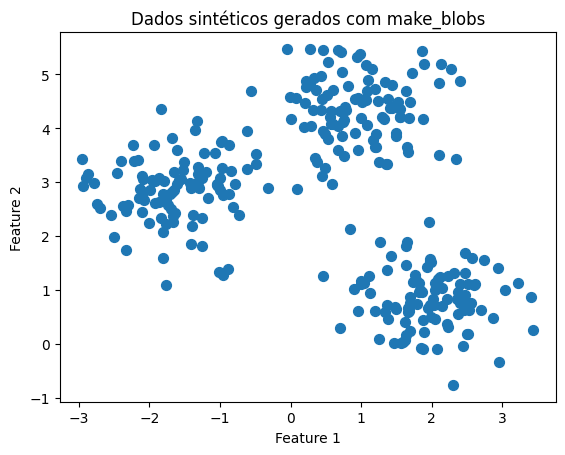

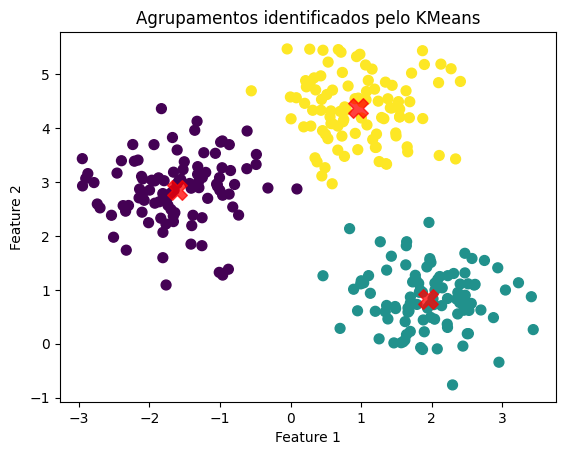

In [44]:
# Importar bibliotecas necessárias
# matplotlib.pyplot: Biblioteca usada para plotar gráficos.
import matplotlib.pyplot as plt
# make_blobs: Gera dados sintéticos com agrupamentos (clusters).
from sklearn.datasets import make_blobs
# KMeans: Algoritmo de aprendizado não supervisionado usado para agrupar dados semelhantes.
from sklearn.cluster import KMeans

# Gerar dados sintéticos com 3 agrupamentos
#vn_samples=300: Gera 300 pontos.
# centers=3: Os dados são agrupados em torno de 3 centros (clusters).
# cluster_std=0.60: Define a "espalhabilidade" de cada grupo. Quanto menor, mais "juntinhos" ficam.
# random_state=0: Garante que a geração dos dados seja sempre igual (reprodutível).
# X: Coordenadas (features) dos pontos.
# y_true: Os rótulos verdadeiros (que não serão usados pelo KMeans, mas servem para comparar depois).
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Visualizar os dados gerados
# Plota os dados usando suas duas primeiras colunas (dimensões).
# Ainda sem aplicar KMeans, apenas visualizando como os dados estão distribuídos.
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dados sintéticos gerados com make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Aplicar KMeans para identificar os agrupamentos
# O que o KMeans faz aqui:
# 1-Inicializa 3 centróides aleatórios (porque pedimos n_clusters=3).
# 2-Etapas repetidas (iterações):
## Cada ponto é atribuído ao centróide mais próximo.
## Os centróides são recalculados com base na média dos pontos atribuídos a eles.
## Isso se repete até os centróides "pararem de mudar" (convergência).
# fit(X): Aplica o algoritmo aos dados.
# predict(X): Retorna o grupo (0, 1 ou 2) ao qual cada ponto foi atribuído.
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar os agrupamentos identificados pelo KMeans
# Os dados agora são coloridos conforme o grupo descoberto pelo KMeans (y_kmeans).
# cmap='viridis': Dá uma coloração agradável aos clusters.
# kmeans.cluster_centers_: Coordenadas dos centros dos grupos aprendidos.
# Esses centros são marcados com um "X" vermelho.
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Agrupamentos identificados pelo KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#Conclusão: O que foi aprendido
#O KMeans separa os dados em grupos com base na proximidade.
#Ele não sabe os rótulos verdadeiros (y_true), mas ainda assim encontra agrupamentos coerentes.
#Esse exemplo é ótimo para visualizar como o KMeans funciona, especialmente por usar dados em 2D.


**O que este código faz:**

Geração de dados: Cria 300 pontos distribuídos em torno de 3 centros distintos.

Visualização inicial: Plota os dados sem qualquer agrupamento para mostrar a distribuição original.

Aplicação do KMeans: Identifica 3 agrupamentos nos dados gerados.

Visualização dos agrupamentos: Plota os dados coloridos de acordo com o agrupamento identificado e marca os centros dos clusters com um "X" vermelho.

**Outros exemplos:**

1. Segmentação de clientes

Você tem um monte de clientes, com dados como: Idade, renda, comportamento de compra, localização etc.

Mas não sabe previamente em quais grupos de clientes deveria dividir (ex: "clientes fiéis", "em risco", "premium").

→ KMeans pode te ajudar a identificar grupos similares naturalmente, com base nas características.

---

2. Detecção de anomalias

Você tem muitos registros (por exemplo, transações bancárias), mas não sabe quais são fraudulentos.

→ Algoritmos não supervisionados podem detectar comportamentos fora do padrão, que você pode investigar como possíveis fraudes.

---

## Aprendizado por Reforço - Exemplo Simples com Gymnasium

**Objetivo:** treinar um agente para aprender com tentativa e erro.

O ambiente **CartPole** é uma simulação em que o agente precisa manter uma barra em pé sobre um carrinho. Toda vez que ele consegue manter a barra em pé, ele ganha uma recompensa. Quando a barra cai, o episódio termina.

A cada passo, o agente pode mover o carrinho para a esquerda ou para a direita. Inicialmente ele age de forma aleatória, mas com o tempo aprende qual ação leva a maiores recompensas.

- Se a haste ficar em pé, o agente ganha +1 ponto de recompensa.
- Se ela cair demais para um lado ou o carrinho sair da tela, o episódio termina.

Para simplificar, vamos usar ações aleatórias e ver como o ambiente funciona.

In [49]:
# Instala o pacote gymnasium com ambientes clássicos, incluindo o CartPole.
!pip install gymnasium[classic_control] > /dev/null
import gymnasium as gym
import numpy as np

# Criar o ambiente
# gym.make("CartPole-v1"): Cria o ambiente.
env = gym.make("CartPole-v1")
# env.reset(): Reinicia o ambiente e retorna o estado inicial (obs) e informações adicionais (info).
obs, info = env.reset()

# Vai acumular a pontuação do episódio.
total_reward = 0

# Rodar um episódio com ações aleatórias
# O loop acumula a soma das recompensas, e para se a haste cair ou o tempo acabar.
for step in range(200):
    # env.render(): Exibe visualmente o ambiente (pode não funcionar no Colab).
    env.render()
    # env.action_space.sample(): Escolhe uma ação aleatória (sem inteligência):
    action = env.action_space.sample()  # Ação aleatória (0 = esquerda, 1 = direita)
    # env.step(action): Aplica a ação e retorna:
    # obs: Novo estado.
    # reward: Recompensa recebida (sempre 1.0 por passo se a haste ainda estiver em pé).
    # terminated: True se o episódio terminou (ex: a haste caiu).
    # truncated: True se o tempo máximo (200 passos) foi atingido.
    # info: Informações extras.
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break

env.close()
print("Recompensa total obtida:", total_reward)

Recompensa total obtida: 10.0


**Nota:** esse foi um exemplo simples para mostrar o funcionamento de um ambiente de reforço. Em casos reais, usamos algoritmos como Q-Learning ou Deep Q-Networks para que o agente aprenda estratégias de forma eficiente.